<a href="https://colab.research.google.com/github/porygon-tech/ECO/blob/main/demos/tutorial_EVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/porygon-tech/ECO

Cloning into 'ECO'...
remote: Enumerating objects: 1035, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (57/57), done.


In [ ]:
!pip install pickle5

In [ ]:
import sys
sys.path.insert(0,'/content/ECO/lib')

import evo
import numpy as np
import matplotlib.pyplot as plt
import matriX as mx

# Setup
Let us create a population of 500 individuals with 100 loci for a certain trait. This trait's phenotypic value will range from 500 to 600.

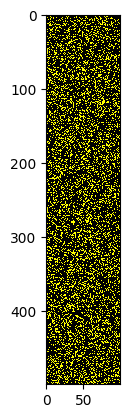

In [ ]:
nloci = 100
skw = 0.25
ps = (500,500+nloci)
pop = evo.population(500,nloci, skew= skw,phenoSpace=ps);pop.show()

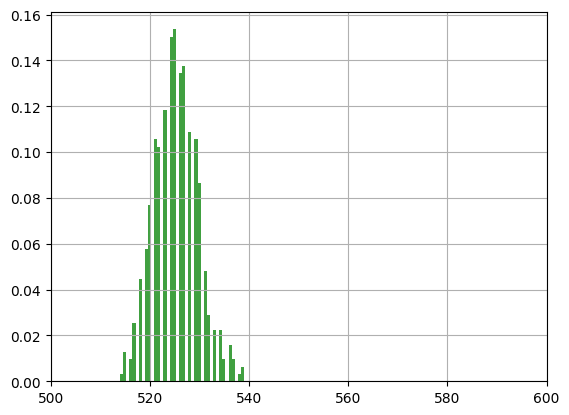

(array([0.0032, 0.0128, 0.    , 0.0096, 0.0256, 0.    , 0.0448, 0.    ,
        0.0576, 0.0768, 0.    , 0.1056, 0.1024, 0.    , 0.1184, 0.    ,
        0.1504, 0.1536, 0.    , 0.1344, 0.1376, 0.    , 0.1088, 0.    ,
        0.1056, 0.0864, 0.    , 0.048 , 0.0288, 0.    , 0.0224, 0.    ,
        0.0224, 0.0096, 0.    , 0.016 , 0.0096, 0.    , 0.0032, 0.0064]),
 array([514.   , 514.625, 515.25 , 515.875, 516.5  , 517.125, 517.75 ,
        518.375, 519.   , 519.625, 520.25 , 520.875, 521.5  , 522.125,
        522.75 , 523.375, 524.   , 524.625, 525.25 , 525.875, 526.5  ,
        527.125, 527.75 , 528.375, 529.   , 529.625, 530.25 , 530.875,
        531.5  , 532.125, 532.75 , 533.375, 534.   , 534.625, 535.25 ,
        535.875, 536.5  , 537.125, 537.75 , 538.375, 539.   ]),
 <BarContainer object of 40 artists>)

In [ ]:
pop.hist(40)

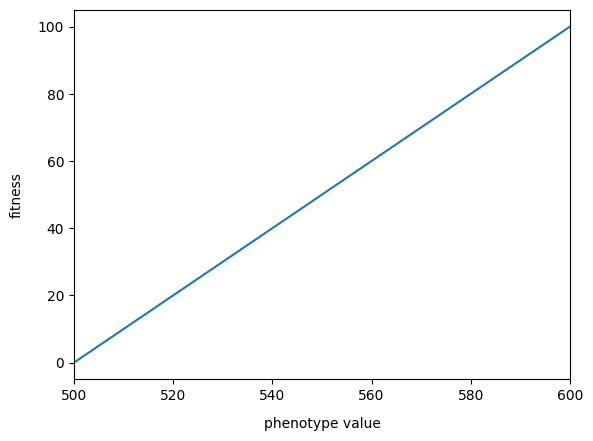

In [ ]:
def f(x):
  return x-500
pop.set_fitnessLandscape(f)
pop.showfitness()

In [ ]:
c=pop.reproduce(200)

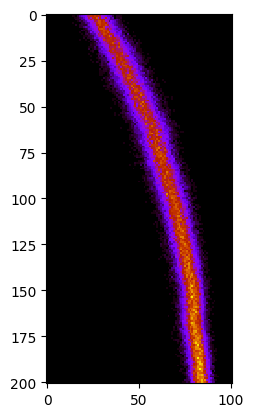

In [ ]:
evo.showdata(c.history)

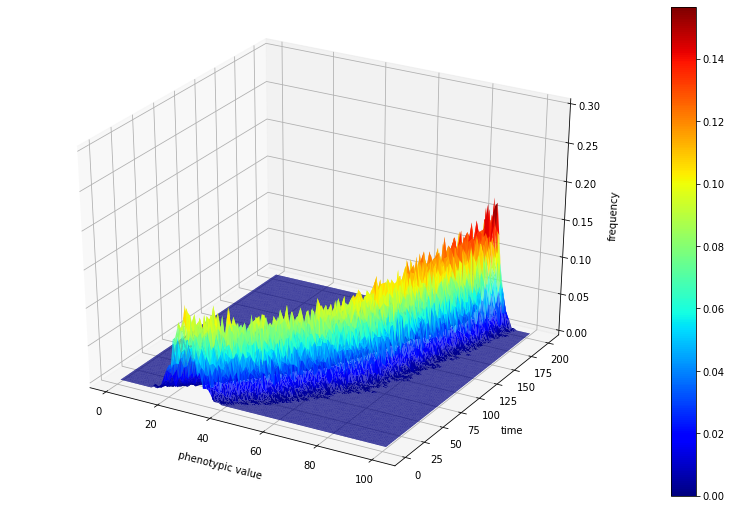

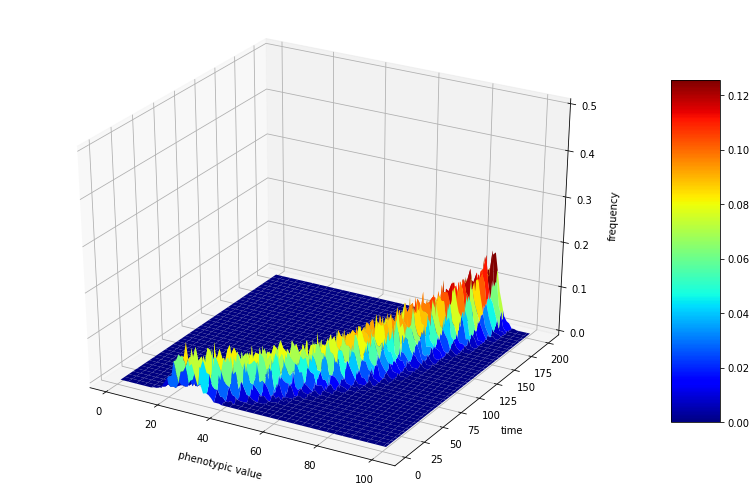

In [ ]:
#mat=genData[:,:30]
mat=c.history
height, width = mat.shape
xi = np.linspace(1, width, width)
yi = np.linspace(1, height, height)
axx, axy = np.meshgrid(xi, yi)

fig = plt.figure(figsize =(14, 9)); ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(axx.flatten(),axy.flatten(),mat.flatten(), cmap=plt.cm.jet, linewidth=0)
ax.set_zlim3d(0,0.3)
ax.set_xlabel('phenotypic value', labelpad=10)
ax.set_ylabel('time', labelpad=10)
ax.set_zlabel('frequency', labelpad=10)
fig.colorbar(surf)
plt.show()

fig = plt.figure(figsize =(14, 9)); ax = plt.axes(projection ='3d')
surf = ax.plot_surface(axx,axy,mat, cmap=plt.cm.jet, edgecolor ='none')
ax.set_zlim3d(0,0.5)
ax.set_xlabel('phenotypic value', labelpad=10)
ax.set_ylabel('time', labelpad=10)
ax.set_zlabel('frequency', labelpad=10)
fig.colorbar(surf, ax = ax, shrink = 0.7, aspect = 7)
plt.show()


# the predict function
These calculations can be predicted analytically instead of through simulations

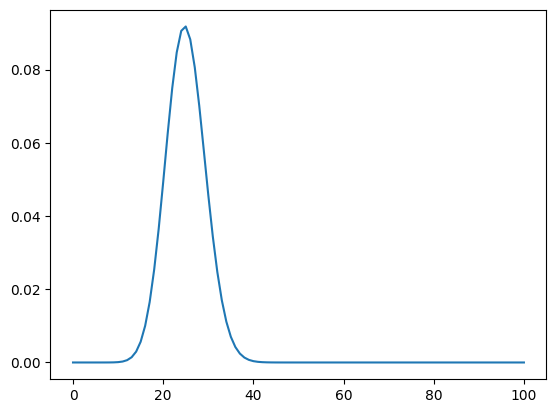

In [ ]:
nstates = nloci+1
v0 = np.c_[np.array([evo.bindist(nloci,i,skw) for i in range(nstates)])]
mx.showlist(v0)

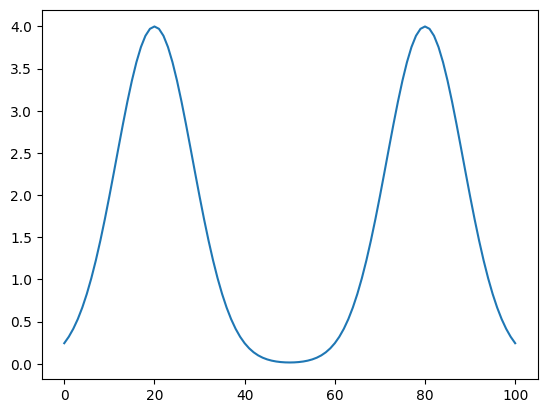

In [ ]:
l = evo.interactors.pM(np.arange(nstates)-20,0.007) + evo.interactors.pM(np.arange(nstates)-80,0.007)
l = np.c_[np.array(4*l)]
mx.showlist(l)

In [ ]:
from os import chdir
from pathlib import Path
import pickle5
import bz2
chdir('/content/ECO')
root = Path(".")
obj_path = root / 'data/obj'

filename='oc_tensor_' + str(nloci) + '.obj'
with bz2.BZ2File(obj_path / filename, 'rb') as f:
	h = pickle5.load(f)

Iterating...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


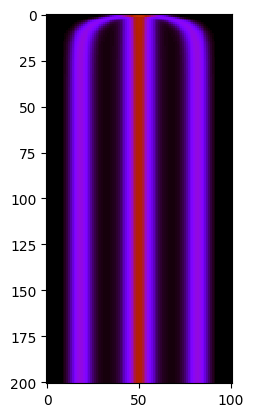

In [ ]:
temp_nt=200
traj = evo.predict(v0,l,h=h,a=-0.0001, ntimesteps=temp_nt) ; mx.showdata(traj)

In [ ]:
traj = evo.predict(v0,l,h=h,a=+0.0001, ntimesteps=temp_nt) ; mx.showdata(traj)

In [ ]:
ps

(500, 600)

Iterating...


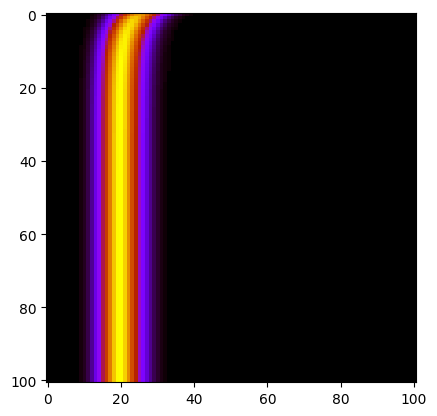

In [ ]:

v0
l
ntimesteps=100
mut=0.
a=0.

v0 = np.c_[list(v0)]
nstates=len(v0)
if type(mut) == float:
    mut= evo.generate_mut_matrix(nstates,mu=mut)

states = np.linspace(ps[0],ps[1], nstates)
statesdiff=np.outer(np.ones(nstates),states)-np.outer(states,np.ones(nstates))
assortMat = evo.interactors.pM(statesdiff,alpha=abs(a))
if a<0:
    assortMat = 1 - assortMat

v = np.zeros((ntimesteps+1, nstates,1))
v[0] = v0


print('Iterating...')
for t in range(1,ntimesteps+1):
#for t in range(1,10):
    w = v[t-1]*l
    w = ((w.T @ assortMat).T * w)/w.sum()
    v[t] = ((w.T @ h @ w) / w.sum()**2)[:,0]
    v[t] = mut @ v[t]

mx.showdata(v)